## Import JSON data file

- __Read data__
    - Test within 60-second window of maximum timestamp
        - maybe maintain a separate list of timestamps
        - or maybe maintain separate variable for max_timestamp
- Prune graph w/r to 60-second window
- __Store graph__
    - Dictionary
        - Key: Each vertex
        - Value: List of all connected vertices
    - Linked list
- Calculate median edges
- Output list of median degree of a vertex

    - update each time new venmo payment appears
    - 60-second sliding time window
- Unit-testing
    - 60-second time window out-of-bounds test
    - Bad data test
    - Big data test
-  Variables
    - Graph_dictionary (w/ builtin 60-second connections)
    - node_name
    - degrees_list
    - median_degree_list

Notes

- Vertices represent venmo users
- Edges represent when one user pays another user
- Node degree is the number of cennected neighboring nodes
- Medean node degree is the middle value of all of the degrees in the graph

The degree of each node is defined as the number of connected neighboring nodes. The median degree is the middle value of all of the degrees in the graph.

Because this payment now has the latest timestamp of 2016-04-07T03:35:02Z, we must add it to our graph while pruning the nodes and edges that fall outside of the 60-second-window (i.e., edge between Maryann-Berry and Ying-Mo must be removed)

----
### Time stamps | Datetime

- [Datetime Timestamps](https://pymotw.com/2/datetime/)

----
### Network graphs

- [NetworkX](http://www.cl.cam.ac.uk/~cm542/teaching/2011/stna-pdfs/stna-lecture11.pdf)


In [14]:
rolling_median('./insight_testsuite/tests/test-2-2-readme/venmo_input/venmo-trans.txt', './venmo_output/output.txt')

Median degrees: 1.0
[1, 1]
['actor:  Jordan-Gruber', 'target: Jamie-Korn', 'time:   2016-04-07 03:33:19']
Median degrees: 1
[1, 1, 2]
['actor:  Jordan-Gruber', 'target: Jamie-Korn', 'time:   2016-04-07 03:33:19']
['actor:  Jamie-Korn', 'target: Maryann-Berry', 'time:   2016-04-07 03:33:19']
Median degrees: 1.5
[1, 1, 2, 2]
['actor:  Jordan-Gruber', 'target: Jamie-Korn', 'time:   2016-04-07 03:33:19']
['actor:  Jamie-Korn', 'target: Maryann-Berry', 'time:   2016-04-07 03:33:19']
['actor:  Ying-Mo', 'target: Maryann-Berry', 'time:   2016-04-07 03:33:19']
Median degrees: 2.0
[1, 2, 2, 3]
['actor:  Jordan-Gruber', 'target: Jamie-Korn', 'time:   2016-04-07 03:33:19']
['actor:  Jamie-Korn', 'target: Ying-Mo', 'time:   2016-04-07 03:34:18']
['actor:  Jamie-Korn', 'target: Maryann-Berry', 'time:   2016-04-07 03:33:19']
['actor:  Ying-Mo', 'target: Maryann-Berry', 'time:   2016-04-07 03:33:19']
Median degrees: 1.0
[1, 1, 1, 1]
['actor:  Maddie-Franklin', 'target: Maryann-Berry', 'time:   2016-0

In [11]:
def calculate_median(nx_graph):
    from statistics import median
    list_degrees = list((nx_graph.degree()).values()) # list of degrees
    list_degrees.sort() # sort the list of degrees
    median_degrees = median(list_degrees)
    print(list_degrees)
    return median_degrees

In [6]:
def prune_unconnected_nodes(nx_graph):
    unconnected_nodes =[n for n,d in nx_graph.degree_iter() if d<1 ]
    nx_graph.remove_nodes_from(unconnected_nodes)
    return nx_graph

In [15]:
def print_graph(nx_graph):
    edge_list = nx_graph.edges(data=True)
    for edge_foo in edge_list:
        # print([  "actor:  "+ edge_foo[0]  \
        #       , "target: "+ edge_foo[1] \
        #       , "time:   "+ str(edge_foo[2]['time'])])

        print('{0:s} {1:s} {2:s}'.format(edge_foo[0], edge_foo[1], str(edge_foo[2]['time'])))

In [16]:
import json 
import networkx as nx
from datetime import datetime

# Building the Venmo Graph
# ------------------------
input_filename       = './insight_testsuite/tests/test-2-0-readme/venmo_input/venmo-trans.txt'
output_filename      = 'venmo_output/output.txt'
output_file          = open(output_filename, 'w')
max_time_window_secs = 60
date_format          = '%Y-%m-%dT%H:%M:%SZ'


venmo_graph = nx.Graph() # create empty network graph

with open(output_filename, 'w') as output_file:
    with open(input_filename, 'r') as json_file:
        for line in json_file:
            data = json.loads(line)

            # Error check missing fields
            #  Skip line if any fields are missing


            # Convert date-string to datetime object
            data['created_time'] = datetime.strptime(  data['created_time'] \
                                                     , date_format)

In [8]:
def prune_edges(nx_graph, time_curr, max_time_window_secs):

    edges_outofbounds = [(u,v) for u,v,dat in nx_graph.edges_iter(data=True) 
                         if (dat['time']-time_curr).total_seconds() <= max_time_window_secs]
    return edges_outofbounds


## Need to add error checks

- __How should I account for transactions that are missing an "actor" field?__
These errors in the input should be ignored by your program with correct exception handling. They should not affect your graph, and should not result in a new line in the output file. For simplicity, we have removed these entries from the sample file we have provided.


- __Should my graph contain disconnected nodes?__
No, the graph should only contain connected nodes, and this also means that you may need to remove nodes if they are no longer connected once payments are evicted from the 60-second window.


- __If there are multiple payments within a 60-second window from the same two users, should they be connected twice?__
No, please don't count multiple connections. In other words, nodes can either be connected by one edge, or not connected at all. However, you should ensure that the timestamp of the corresponding edge is properly updated.

In [12]:
def rolling_median(input_filename, output_filename):
    import json 
    import networkx as nx
    from datetime import datetime

    # Building the Venmo Graph
    # ------------------------
    #     input_filename       = './insight_testsuite/tests/test-2-0-readme/venmo_input/venmo-trans.txt'
    #     output_filename      = 'venmo_output/output.txt'
    output_file          = open(output_filename, 'w')
    max_time_window_secs = 60
    date_format          = '%Y-%m-%dT%H:%M:%SZ'


    venmo_graph = nx.Graph() # create empty network graph

    with open(output_filename, 'w') as output_file:
        with open(input_filename, 'r') as json_file:
            for line in json_file:
                data = json.loads(line)

                # Error check missing fields
                #  Skip line if any fields are missing


                # Convert date-string to datetime object
                data['created_time'] = datetime.strptime(  data['created_time'] \
                                                         , date_format)

                time_curr = data['created_time']

                # Save the first maximum timestamp
                if venmo_graph.number_of_edges() == 0:
                    time_max = time_curr        


                if time_curr > time_max:
                    time_max = time_curr

                    ########
                    # Add edge + time-info to graph
                    venmo_graph.add_edge(  data['actor'] \
                                         , data['target']\
                                         , time = data['created_time'])
                    ########

                    ########
                    # Prune

                    edge_list = venmo_graph.edges(data=True)

                    # actor = Maryann-Berry,     target = Maddie-Franklin,     created_time: 2016-04-07T03:34:58Z
                    time_curr = data['created_time']
                    for edge_foo in edge_list:
                        time_check = edge_foo[2]['time']
                        time_diff  = (time_curr - time_check)

                        if time_diff.total_seconds() > max_time_window_secs:
                            venmo_graph.remove_edge(edge_foo[0],edge_foo[1])
                    prune_unconnected_nodes(venmo_graph)
                    

                    ########
                else:
                    # Out of order

                    # if the curr_time is within the 60-time-window
                    time_diff = time_max - time_curr

                    if time_diff.total_seconds() <= max_time_window_secs:
                        ########
                        # Add edge + time-info to graph
                        venmo_graph.add_edge(  data['actor'] \
                                             , data['target']\
                                             , time = data['created_time'])
                        ########


                ########
                ## Output: Print median
                median_degree = calculate_median(venmo_graph)
                output_file.write('%1.2f\n' % median_degree)
                
                print_graph(venmo_graph)
                print('Median degrees: %1.2f\n' % median_degree)

                ########


Median degrees: 1.0
[1, 1]
['actor:  Jordan-Gruber', 'target: Jamie-Korn', 'time:   2016-04-07 03:33:19']
Median degrees: 1
[1, 1, 2]
['actor:  Jordan-Gruber', 'target: Jamie-Korn', 'time:   2016-04-07 03:33:19']
['actor:  Jamie-Korn', 'target: Maryann-Berry', 'time:   2016-04-07 03:33:19']
Median degrees: 1.5
[1, 1, 2, 2]
['actor:  Jordan-Gruber', 'target: Jamie-Korn', 'time:   2016-04-07 03:33:19']
['actor:  Jamie-Korn', 'target: Maryann-Berry', 'time:   2016-04-07 03:33:19']
['actor:  Ying-Mo', 'target: Maryann-Berry', 'time:   2016-04-07 03:33:19']
Median degrees: 2.0
[1, 2, 2, 3]
['actor:  Jordan-Gruber', 'target: Jamie-Korn', 'time:   2016-04-07 03:33:19']
['actor:  Jamie-Korn', 'target: Ying-Mo', 'time:   2016-04-07 03:34:18']
['actor:  Jamie-Korn', 'target: Maryann-Berry', 'time:   2016-04-07 03:33:19']
['actor:  Ying-Mo', 'target: Maryann-Berry', 'time:   2016-04-07 03:33:19']
Median degrees: 1.0
[1, 1, 1, 1]
['actor:  Maddie-Franklin', 'target: Maryann-Berry', 'time:   2016-0

In [84]:
print('Edges: ' + str(venmo_graph.number_of_edges()))
print('Nodes: ' + str(venmo_graph.number_of_nodes()))
print('Avg Degree: ' + str(venmo_graph.number_of_edges() / \
                           venmo_graph.number_of_nodes()))

Edges: 4
Nodes: 4
Avg Degree: 1.0


## Import JSON data

In [49]:
# each JSON is small, there's no need in iterative processing
filename = './data-gen/venmo-trans.txt'
import json 
with open(filename, 'r') as json_file:
    for line in json_file:
        data = json.loads(line)

In [50]:
data

{'actor': 'Lizzie-Friend',
 'created_time': datetime.datetime(2016, 3, 29, 6, 4, 49),
 'target': 'Rachelmanning_'}

In [23]:
type(data)

dict

In [21]:
data['actor']

'Lizzie-Friend'

In [48]:
data['created_time']

datetime.datetime(2016, 3, 29, 6, 4, 49)

In [20]:
data['target']

'Rachelmanning_'

## Convert date string into datetime object

In [43]:
# Convert date string to datetime obj
from datetime import datetime

date_format = '%Y-%m-%dT%H:%M:%SZ'
date = datetime.strptime(data['created_time'], date_format)

In [44]:
date-date

datetime.timedelta(0)

In [47]:
data['created_time'] = datetime.strptime(data['created_time'], date_format)

## NetworkX sandbox

In [166]:
import networkx as nx

g = nx.Graph() # create empty graph
# g.add_edge(data['actor'], data['target'], time=data['created_time'])

In [167]:
g.number_of_edges()

0

In [74]:
g.number_of_nodes()

2

In [75]:
g.nodes()

['Rachelmanning_', 'Lizzie-Friend']

In [82]:
g.edges()

[('Rachelmanning_', 'Lizzie-Friend')]

In [77]:
list((g.degree()).values())  # list of degrees

[1, 1]

In [83]:
g[data['actor']][data['target']]['time'] # edge 'time' 

datetime.datetime(2016, 3, 29, 6, 4, 49)

In [84]:
g[data['actor']][data['target']]

{'time': datetime.datetime(2016, 3, 29, 6, 4, 49)}

### Calculating median degree of the network graph

In [ ]:
def calculate_median(venmo_graph)

Median degrees: 1


2

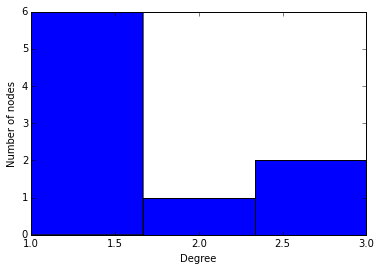

In [119]:
from statistics import median

list_degrees = list((venmo_graph.degree()).values()) # list of degrees
list_degrees.sort() # sort the list of degrees



# Unit test: Print histogram to visually verify median calculation
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(list_degrees, bins=max(list_degrees))
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
print('Median degrees: ' + str(median(list_degrees)) )


# Unit test:
list_degrees[int(len(list_degrees)/2)] + 1



input: networkx graph, incoming-edge/timestamp, max-timewindow

- How do I get all edges that meet a specific timestamp requirement?
  - Access an edge based upon timestamp
  - <strike>Consider: 
    1. __Convert NetworkX_graph to Pandas_df__
    2. filter/prune by timediff
    3. convert pandas_df back to networkx_graph (w/ pruning)</strike>
  
Notes:
- [Traversing edges](https://networkx.github.io/documentation/development/reference/classes.graph.html)



## Maintain data within the 60-second window

Now let's say that the next payment comes in and the extracted information is 

	actor = Maryann-Berry, 	target = Maddie-Franklin, 	created_time: 2016-04-07T03:34:58Z

Extracted information from the five payments is

	actor = Jordan-Gruber, 	target = Jamie-Korn, 		created_time: 2016-04-07T03:33:19Z
	actor = Maryann-Berry, 	target = Jamie-Korn, 		created_time: 2016-04-07T03:33:19Z
	actor = Ying-Mo, 		target = Maryann Berry, 	created_time: 2016-04-07T03:33:19Z
	actor = Jamie-Korn, 	target = Ying-Mo, 			created_time: 2016-04-07T03:34:18Z
	actor = Maryann-Berry, 	target = Maddie-Franklin, 	created_time: 2016-04-07T03:34:58Z
	
We can see that the first three payments have a timestamp that is more than 60 seconds older than this new payment. This means that the edges formed by the three payments should be evicted and should not be included in our median degree calculation.

The revised information to be used in constructing the graph is as follows:

	actor = Jamie-Korn, 	target = Ying-Mo, 			created_time: 2016-04-07T03:34:18Z
	actor = Maryann-Berry, 	target = Maddie-Franklin, 	created_time: 2016-04-07T03:34:58Z

The edge list is now:
	
	Jamie-Korn <-> Ying-Mo
	
	Maryann-Berry <-> Maddie-Franklin
	
The graph has now changed to: 

![venmo-graph](images/htag_graph_5.png)

![venmo-graph](images/htag_graph_5-1.png)

The rolling median degree, recalculated from {1, 1, 1, 1}, = 1.00 

Normally, the median degree is calculated for a single graph, but maintaining multiple graphs for this problem can be quite difficult. For simplicity, we are only interested in calculating the median degree of all the nodes in all graphs despite them being disconnected.

The list of rolling median degrees now becomes:

	1.00
	1.00
	1.50
	2.00
	1.00


In [127]:
edge_list = venmo_graph.edges(data=True)

# actor = Maryann-Berry,     target = Maddie-Franklin,     created_time: 2016-04-07T03:34:58Z

time_curr = datetime.strptime('2016-04-07T03:34:58Z', date_format)
for edge_foo in edge_list:
    time_check = edge_foo[2]['time']
    time_diff  = abs(time_curr - time_check)

    if time_diff.total_seconds() > max_time_window_secs:
        print(['Prune: ', time_diff.total_seconds(), edge_foo[0], edge_foo[1]])
        venmo_graph.remove_edge(edge_foo[0],edge_foo[1])
    else:
        print(['Keep:  ', time_diff.total_seconds(), edge_foo[0], edge_foo[1]])

['Prune: ', 99.0, 'Jordan-Gruber', 'Jamie-Korn']
['Keep:  ', 40.0, 'Ying-Mo', 'Jamie-Korn']
['Prune: ', 99.0, 'Ying-Mo', 'Maryann-Berry']
['Prune: ', 99.0, 'Maryann-Berry', 'Jamie-Korn']


In [64]:
for n,nbrsdict in venmo_graph.adjacency_iter():     
    for nbr,eattr in nbrsdict.items():
        print([n,nbr,eattr['time']])

['Katie-Howell', 'stephfilosa', datetime.datetime(2016, 3, 28, 23, 25, 20)]
['Katie-Howell', 'Alex-Spangler-1', datetime.datetime(2016, 3, 28, 23, 25, 20)]
['Katie-Howell', 'rcraven94', datetime.datetime(2016, 3, 28, 23, 25, 20)]
['GianaDeNisi', 'Davida-Graber', datetime.datetime(2016, 3, 29, 6, 4, 48)]
['GianaDeNisi', 'ixixiv', datetime.datetime(2016, 3, 29, 6, 4, 48)]
['GianaDeNisi', 'Xiangtai-Sun', datetime.datetime(2016, 3, 29, 6, 4, 48)]
['GianaDeNisi', 'Brett-Youngbeck', datetime.datetime(2016, 3, 29, 6, 4, 48)]
['GianaDeNisi', 'Ben-Bell-5', datetime.datetime(2016, 3, 29, 6, 4, 48)]
['GianaDeNisi', 'Ben-Bell-7', datetime.datetime(2016, 3, 29, 6, 4, 48)]
['Katie-Pair', 'ShannenOlan', datetime.datetime(2016, 3, 29, 2, 14, 26)]
['Katie-Pair', 'Fallon-VP', datetime.datetime(2016, 3, 29, 2, 14, 26)]
['Katie-Pair', 'Mukta-Ghorpadey', datetime.datetime(2016, 3, 29, 2, 14, 26)]
['HunterUpton6', 'Ryan-Geary-3', datetime.datetime(2016, 3, 29, 2, 13, 59)]
['HunterUpton6', 'Olivia-Campbell',

In [50]:
#inputs
max_time_window_secs = 60
edge_curr  = venmo_graph['charlotte-macfarlane']['joedavis04']
edge_graph = venmo_graph['Claudia-Santander']['Karo-Hernandez']


# iterate through each graph edge
# check if the timestamp is w/n the max_time_window_secs
#   if so, then keep
#   if not, then prune that edge




time_curr  = edge_curr['time']
time_graph = edge_graph['time']
time_diff  = time_curr - time_past

print(time_curr)
print(time_graph)
print(time_diff)

if time_diff.total_seconds() > max_time_window_secs:
    print('Prune')
    # venmo_graph.remove_edge(time_a, time_b)
else: 
    print('No prune')

# if time-diff is greater than the max_time_window 

2016-03-29 06:04:51
2016-03-29 06:04:50
0:00:01
No prune


## Dealing with payments that arrive out of time
[Back to Table of Contents](README.md#table-of-contents)

Payments that are out of order and fall within the 60 second window of the maximum timestamp processed, or in other words, are less than 60 seconds from the maximum timestamp being processed, will create new edges in the graph. 

However, payments that are out of order in time and outside the 60-second window (or more than 60 seconds from the maximum timestamp being processed) should be ignored. Such payments won't contribute to building the graph. Below is a diagram showing this situation, with the nth payment corresponding the payment on the nth line of the `venmo-trans.txt` file.

![venmo-graph](images/htag_graph_6.png)

Continuing our example, another new payment comes in with the following extracted information:

	actor = Maryann-Berry, target = Ying-Mo, created_time: 2016-04-07T03:34:00Z

This payment is out of order but its timestamp still falls within the 60-second time window of the maximum timestamp that has been processed. (i.e., `2016-04-07T03:34:58Z`)

So the edge list is now

	actor = Jamie-Korn,    target = Ying-Mo, 		 created_time: 2016-04-07T03:34:18Z
	actor = Maryann-Berry, target = Maddie-Franklin, created_time: 2016-04-07T03:34:58Z
	actor = Maryann-Berry, target = Ying-Mo, 		 created_time: 2016-04-07T03:34:00Z
	
![venmo-graph](images/htag_graph_7.png)

![venmo-graph](images/htag_graph_7-1.png)

The median degree now calculated from {1, 1, 2, 2} = 1.50. The list of rolling median degrees becomes:

	1.00
	1.00
	1.50
	2.00
	1.00
	1.50
	
Another payment now arrives

	actor = Natalie-Piserchio, target = Rebecca-Waychunas, created_time: 2016-04-07T03:31:18Z

But this payment is out of order and its timestamp is outside of the maximum timestamp last processed (i.e., `2016-04-07T03:34:58Z`). This payment should be ignored. It will not form any new edges and will not contribute to the graph. The graph remains the same as before this payment arrived. 

The rolling median is the same as before: {1, 1, 2, 2} = 1.50. 
	
	1.00
	1.00
	1.50
	2.00
	1.00
	1.50
	1.50

Finally, another payment arrives with this information:

	actor = Nick-Shirreffs, target = Connor-Liebman, created_time: 2016-04-07T03:35:02Z

Because this payment now has the latest timestamp of `2016-04-07T03:35:02Z`, we must add it to our graph while pruning the nodes and edges that fall outside of the 60-second-window (i.e., edge between `Maryann-Berry` and `Ying-Mo` must be removed)

The payments now represented in the graph are:

	actor = Jamie-Korn, 	target = Ying-Mo, 		  created_time: 2016-04-07T03:34:18Z
	actor = Maryann-Berry,  target = Maddie-Franklin, created_time: 2016-04-07T03:34:58Z
	actor = Nick-Shirreffs, target = Connor-Liebman,  created_time: 2016-04-07T03:35:02Z
	
![venmo-graph](images/htag_graph_8.png)

![venmo-graph](images/htag_graph_8-1.png)

The new median degree, calculated from {1, 1, 1, 1, 1, 1} = 1.00 and our new list of rolling medians is

	1.00
	1.00
	1.50
	2.00
	1.00
	1.50
	1.50
	1.00

The output should be a file in the `venmo_output` directory named `output.txt` that contains the rolling median for each transaction in the file (e.g. if there are three input transactions, then there should be 3 medians), following the format above. The precision of the median should be two digits after the decimal place with truncation.



In [143]:
datetime.now()-datetime.now()

datetime.timedelta(-1, 86399, 999990)

In [153]:
# Saving the max timestamp
from datetime import datetime

time_max = datetime()


if time_curr > timestamp_max


SyntaxError: invalid syntax (<ipython-input-153-dce84b8067e1>, line 7)

In [155]:
time_max = datetime.datetime.strptime('2016-04-07T03:34:58Z', date_format)

if time_curr > time_max:
    time_max = time_curr
    
time_curr - 

True

In [156]:
time_curr

datetime.datetime(2016, 4, 7, 3, 35, 2)

In [246]:
statistics.median()

NameError: name 'statistics' is not defined

In [48]:
''.empty()

AttributeError: 'str' object has no attribute 'empty'

In [52]:
myString = 'a'
if not myString:
    print('empty')

In [21]:
import sys

def main(argv):
    # My code here
    pass


main(sys.argv)

In [22]:
?sys.argv

In [24]:
foo = list(['a','b'])

In [26]:
foo[1]

'b'

In [28]:
import sys
import json 
import networkx as nx
from datetime import datetime

def main(argv):

    # Building the Venmo Graph
    # ------------------------
    #     input_filename       = './insight_testsuite/tests/test-2-0-readme/venmo_input/venmo-trans.txt'
    #     output_filename      = 'venmo_output/output.txt'
    input_filename       = str(argv[0])
    output_filename      = str(argv[1])
    output_file          = open(output_filename, 'w')
    max_time_window_secs = 60
    date_format          = '%Y-%m-%dT%H:%M:%SZ'


    venmo_graph = nx.Graph() # create empty network graph

    with open(output_filename, 'w') as output_file:
        with open(input_filename, 'r') as json_file:
            for line in json_file:
                data = json.loads(line)

                # Error check missing fields
                #  Skip line if any fields are missing


                # Convert date-string to datetime object
                data['created_time'] = datetime.strptime(  data['created_time'] \
                                                         , date_format)

                time_curr = data['created_time']

                # Save the first maximum timestamp
                if venmo_graph.number_of_edges() == 0:
                    time_max = time_curr        


                if time_curr > time_max:
                    time_max = time_curr

                    ########
                    # Add edge + time-info to graph
                    venmo_graph.add_edge(  data['actor'] \
                                         , data['target']\
                                         , time = data['created_time'])
                    ########

                    ########
                    # Prune

                    edge_list = venmo_graph.edges(data=True)

                    # actor = Maryann-Berry,     target = Maddie-Franklin,     created_time: 2016-04-07T03:34:58Z
                    time_curr = data['created_time']
                    for edge_foo in edge_list:
                        time_check = edge_foo[2]['time']
                        time_diff  = (time_curr - time_check)

                        if time_diff.total_seconds() > max_time_window_secs:
                            venmo_graph.remove_edge(edge_foo[0],edge_foo[1])
                    prune_unconnected_nodes(venmo_graph)
                    

                    ########
                else:
                    # Out of order

                    # if the curr_time is within the 60-time-window
                    time_diff = time_max - time_curr

                    if time_diff.total_seconds() <= max_time_window_secs:
                        ########
                        # Add edge + time-info to graph
                        venmo_graph.add_edge(  data['actor'] \
                                             , data['target']\
                                             , time = data['created_time'])
                        ########


                ########
                ## Output: Print median
                median_degree = calculate_median(venmo_graph)
                output_file.write('%1.2f\n' % median_degree)
                
                print_graph(venmo_graph)
                print('Median degrees: %1.2f\n' % median_degree)

                ########

def print_graph(nx_graph):
    edge_list = nx_graph.edges(data=True)
    for edge_foo in edge_list:
        print([ "actor:  "+ edge_foo[0]  \
              , "target: "+ edge_foo[1] \
              , "time:   "+ str(edge_foo[2]['time'])])
    return


def prune_unconnected_nodes(nx_graph):
    unconnected_nodes =[n for n,d in nx_graph.degree_iter() if d<1 ]
    nx_graph.remove_nodes_from(unconnected_nodes)
    return nx_graph


def calculate_median(nx_graph):
    import statistics
    list_degrees = list((nx_graph.degree()).values()) # list of degrees
    list_degrees.sort() # sort the list of degrees
    median_degrees = statistics.median(list_degrees)
    print(list_degrees)
    return median_degrees



In [31]:
main(['./venmo_input/venmo-trans.txt', 'venmo_output/output.txt'])

[1, 1]
['actor:  Jordan-Gruber', 'target: Jamie-Korn', 'time:   2016-04-07 03:33:19']
Median degrees: 1.00

[1, 1, 2]
['actor:  Jordan-Gruber', 'target: Jamie-Korn', 'time:   2016-04-07 03:33:19']
['actor:  Jamie-Korn', 'target: Maryann-Berry', 'time:   2016-04-07 03:33:19']
Median degrees: 1.00

[1, 1, 2, 2]
['actor:  Jordan-Gruber', 'target: Jamie-Korn', 'time:   2016-04-07 03:33:19']
['actor:  Jamie-Korn', 'target: Maryann-Berry', 'time:   2016-04-07 03:33:19']
['actor:  Ying-Mo', 'target: Maryann-Berry', 'time:   2016-04-07 03:33:19']
Median degrees: 1.50

[1, 2, 2, 3]
['actor:  Jordan-Gruber', 'target: Jamie-Korn', 'time:   2016-04-07 03:33:19']
['actor:  Jamie-Korn', 'target: Ying-Mo', 'time:   2016-04-07 03:34:18']
['actor:  Jamie-Korn', 'target: Maryann-Berry', 'time:   2016-04-07 03:33:19']
['actor:  Ying-Mo', 'target: Maryann-Berry', 'time:   2016-04-07 03:33:19']
Median degrees: 2.00



In [32]:
sys.argv

['/Users/jason/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py',
 '-f',
 '/Users/jason/Library/Jupyter/runtime/kernel-40e67743-b93f-401e-b4e9-f4f47a9f50aa.json']

NameError: name 'argin' is not defined

In [35]:
sys.argv

['/Users/jason/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py',
 '-f',
 '/Users/jason/Library/Jupyter/runtime/kernel-40e67743-b93f-401e-b4e9-f4f47a9f50aa.json']

In [36]:
?sys